Daniel Matus

Machine Learning I

Lab 3

In [9]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [11]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8726 - loss: 0.4452
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9648 - loss: 0.1192
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9791 - loss: 0.0739
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9839 - loss: 0.0516
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9894 - loss: 0.0364


In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([7.4739972e-08, 5.7396541e-09, 4.8983640e-07, 3.6714740e-05,
       1.1240960e-11, 6.5684361e-08, 6.2538759e-12, 9.9996132e-01,
       8.3434145e-08, 1.1371998e-06], dtype=float32)

In [ ]:
predictions[0].argmax()

7

In [ ]:
predictions[0][7]

0.9999613

In [ ]:
test_labels[0]

7

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9786 - loss: 0.0731
test_acc: 0.9805999994277954


In [ ]:
train_images.ndim

2

In [ ]:
train_images.shape

(60000, 784)

In [ ]:
train_images.dtype

dtype('float32')

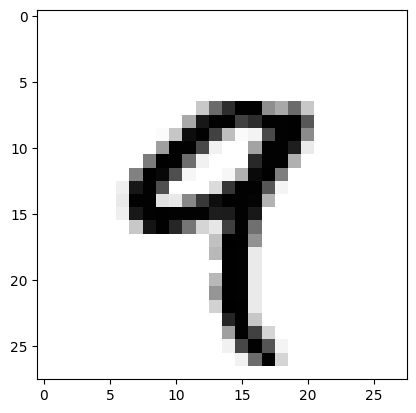

9

In [ ]:
import matplotlib.pyplot as plt
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
train_labels[4]

In [ ]:
my_slice = train_images[10:100]
print(my_slice.shape)
my_slice = train_images[10:100, :, :]
print(my_slice.shape)
my_slice = train_images[10:100, 0:28, 0:28]
print(my_slice.shape)

(90, 28, 28)
(90, 28, 28)
(90, 28, 28)


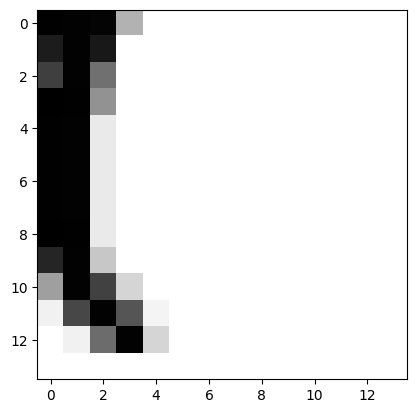

9

In [ ]:
my_slice = train_images[4, 14:, 14:]
digit = train_images[4, 14:, 14:]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

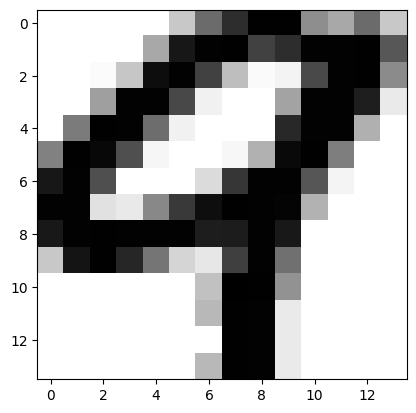

In [ ]:
my_slice = train_images[4, 7:-7, 7:-7]
digit = train_images[4, 7:-7, 7:-7]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [4]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

import numpy as np
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s
Took: 2.54 s


In [8]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [15]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,),
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

In [16]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights


In [19]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4


InvalidArgumentError: {{function_node __wrapped__Fill_device_/job:localhost/replica:0/task:0/device:CPU:0}} dims must represent a vector, got shape [1,1] [Op:Fill] name: 

In [20]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels


In [24]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [27]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

In [28]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")


In [29]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)


Epoch 0
loss at batch 0: 2.41
loss at batch 100: 2.27
loss at batch 200: 2.12
loss at batch 300: 2.06
loss at batch 400: 1.91
Epoch 1
loss at batch 0: 1.86
loss at batch 100: 1.82
loss at batch 200: 1.65
loss at batch 300: 1.63
loss at batch 400: 1.54
Epoch 2
loss at batch 0: 1.47
loss at batch 100: 1.47
loss at batch 200: 1.29
loss at batch 300: 1.32
loss at batch 400: 1.27
Epoch 3
loss at batch 0: 1.19
loss at batch 100: 1.21
loss at batch 200: 1.04
loss at batch 300: 1.10
loss at batch 400: 1.09
Epoch 4
loss at batch 0: 1.00
loss at batch 100: 1.03
loss at batch 200: 0.87
loss at batch 300: 0.94
loss at batch 400: 0.96
Epoch 5
loss at batch 0: 0.87
loss at batch 100: 0.89
loss at batch 200: 0.75
loss at batch 300: 0.83
loss at batch 400: 0.87
Epoch 6
loss at batch 0: 0.78
loss at batch 100: 0.79
loss at batch 200: 0.66
loss at batch 300: 0.75
loss at batch 400: 0.80
Epoch 7
loss at batch 0: 0.70
loss at batch 100: 0.72
loss at batch 200: 0.60
loss at batch 300: 0.69
loss at batch 40

In [30]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")


accuracy: 0.87


In [31]:
import numpy as np
import tensorflow as tf
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

x = tf.ones(shape=(2, 2))
x[0, 0] = 0.

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [35]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)
v.assign(tf.ones((3, 1)))
v[0, 0].assign(3.)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-1.729148 ],
       [ 1.0982456],
       [ 2.601255 ]], dtype=float32)>


<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [36]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [37]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [38]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

In [39]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

In [40]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [42]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))


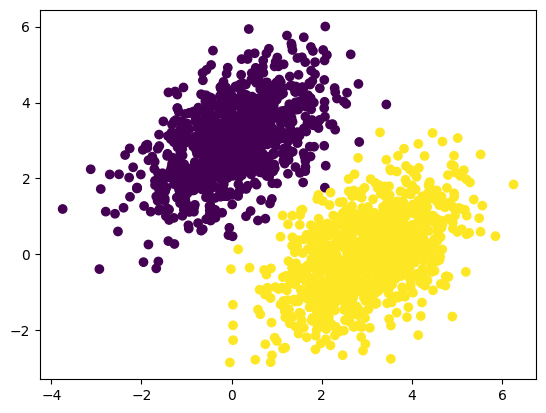

In [43]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()


In [44]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [47]:
def model(inputs):
    return tf.matmul(inputs, W) + b
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss


In [48]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")


Loss at step 0: 0.8769
Loss at step 1: 0.1478
Loss at step 2: 0.0999
Loss at step 3: 0.0883
Loss at step 4: 0.0821
Loss at step 5: 0.0771
Loss at step 6: 0.0726
Loss at step 7: 0.0685
Loss at step 8: 0.0647
Loss at step 9: 0.0613
Loss at step 10: 0.0582
Loss at step 11: 0.0553
Loss at step 12: 0.0527
Loss at step 13: 0.0503
Loss at step 14: 0.0482
Loss at step 15: 0.0462
Loss at step 16: 0.0444
Loss at step 17: 0.0427
Loss at step 18: 0.0412
Loss at step 19: 0.0398
Loss at step 20: 0.0386
Loss at step 21: 0.0374
Loss at step 22: 0.0364
Loss at step 23: 0.0354
Loss at step 24: 0.0346
Loss at step 25: 0.0338
Loss at step 26: 0.0330
Loss at step 27: 0.0324
Loss at step 28: 0.0318
Loss at step 29: 0.0312
Loss at step 30: 0.0307
Loss at step 31: 0.0303
Loss at step 32: 0.0298
Loss at step 33: 0.0295
Loss at step 34: 0.0291
Loss at step 35: 0.0288
Loss at step 36: 0.0285
Loss at step 37: 0.0282
Loss at step 38: 0.0280
Loss at step 39: 0.0278


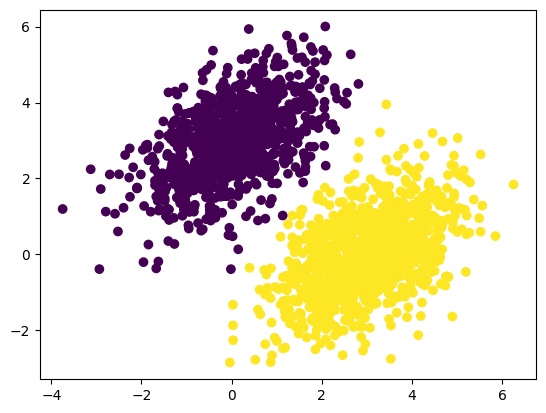

In [49]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()


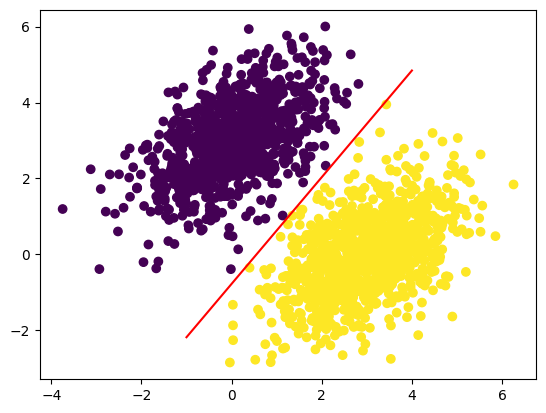

In [50]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)